# Part II - (Loan Data from Prosper)
## by (Ridwan Taiwo)



## Investigation Overview


> For the presentation purpose, I want to focus on the most interesting insights found during the exploration analysis of the dataset. These insights revolve around the relationship between APR (the main variable of interest) and loan amount, prosper rating, prosper score, recommendations and income range. 



## Dataset Overview

> The dataset used in this project is popularly known as "Loan Data from Prosper". This data consists of 113,937 loan records of individuals. There are 81 features describing the loan data. The features I considered most important are extracted for this project. These include term, loan status, borrower APR, borrower rate, prosper rating (numeric), prosper score, occupation, income range, loan original amount and recommendations. 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

#removing unnecessary columns or features
loan_data.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'ClosedDate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'BorrowerState',
        'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors'], axis = 1, inplace=True)

#changing the name of the dataframe for easy handling
df = loan_data
df

#dropping all rows with null values
df.dropna(inplace=True)



In [5]:
#rename some of the columns for easy handling
df.rename(columns ={'BorrowerAPR' : 'APR', 'BorrowerRate': 'InterestRate', 'ProsperRating (numeric)' :'ProsperRating', 'LoanOriginalAmount': 'LoanAmount'}, inplace=True)
df.head()

,Term,LoanStatus,APR,InterestRate,ProsperRating,ProsperScore,Occupation,IncomeRange,LoanAmount,Recommendations
1,36,Current,0.12016,0.0920,6.0,7.0,Professional,"$50,000-74,999",10000,0
3,36,Current,0.12528,0.0974,6.0,9.0,Skilled Labor,"$25,000-49,999",10000,0
4,36,Current,0.24614,0.2085,3.0,4.0,Executive,"$100,000+",15000,0
5,60,Current,0.15425,0.1314,5.0,10.0,Professional,"$100,000+",15000,0
6,36,Current,0.31032,0.2712,2.0,2.0,Sales - Retail,"$25,000-49,999",3000,0


### Showing the distribution of the borrowers' APR 

The figure shows that the APR data is multimodal as it contains different peaks. The highest peak lies between 0.35 and 0.36. This suggests that the APR of most of the data is between 35-36%.

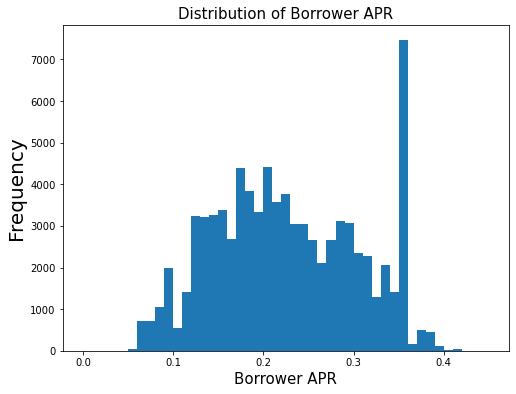

In [7]:
###Visualization 

bins = np.arange(0, df['APR'].max()+0.03, 0.01)
plt.figure(figsize = [8, 6])
plt.hist(data = df, x = 'APR', bins = bins)
plt.ylabel('Frequency', fontsize= 20)
plt.xlabel('Borrower APR', fontsize= 15)
plt.title('Distribution of Borrower APR', fontsize= 15);

### Showing the distribution of the borrowers' income range

The figure depicts that the income of most of the borrowers ranged between 25,000-49,999 followed by 50,000-74,999.

It is noted that the number of borrowers increases as their income increase untill it gets to 25,000-49,999 and then decreases. This may indicate that people with 25,000-49,999 income range are in the middle class.

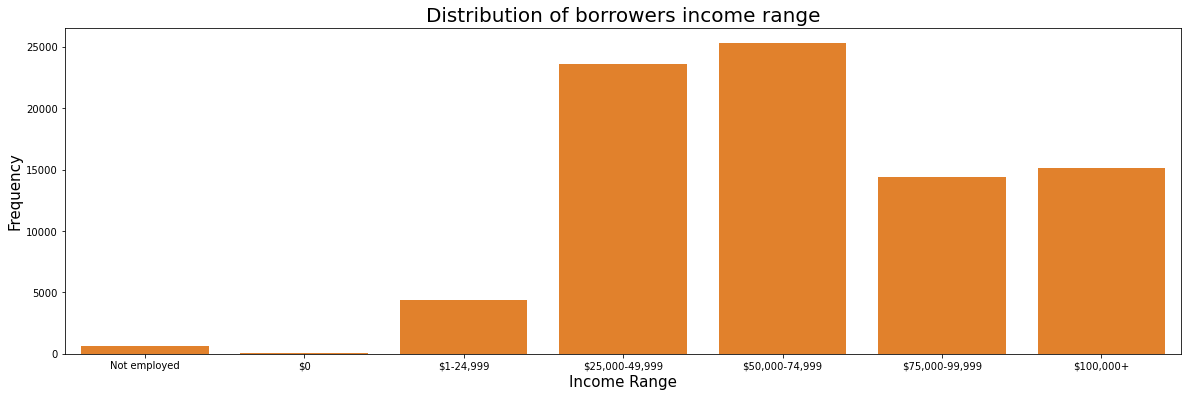

In [8]:
## (Visualization 2)

#reorder the incomerange column from low income to high income
income_range = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
income_class = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df['IncomeRange'] = df['IncomeRange'].astype(income_class)

#visualisation
plt.figure(figsize=(20,6))
color = sns.color_palette()[1]
sns.countplot(data = df, x='IncomeRange', color=color)
plt.ylabel('Frequency', fontsize= 15)
plt.xlabel('Income Range', fontsize= 15)
plt.title('Distribution of borrowers income range', fontsize= 20);

### Pearson Correlation Coefficent between APR, Loan Amount, Prosper Rating, Prosper Score, and Recommendations.

The matrix shows that APR is negatively correlated with LoanAmount (r= -0.428). This is intuitively okay since huge amount of loan should attract lesser APR. 

Furthermore, it shows that APR is negatively correlated with prosper rating, prosper score, and recommendations. These observations make sense since APR of borrowers that have low risk (i.e., high rating and score) are expected to be low. The same judgement is applicable to recommendations.


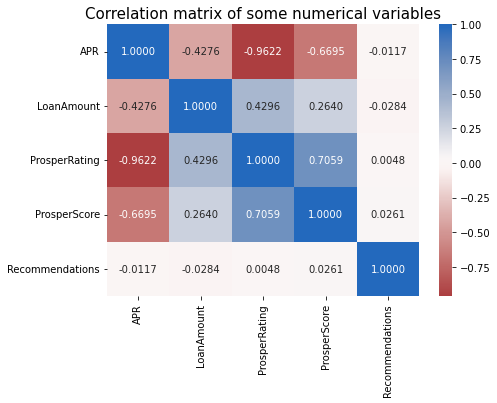

In [11]:
#plotting a correlation matrix to generate the Pearson coeffients
plt.figure(figsize = [7, 5])
L1 = ['APR', 'LoanAmount','ProsperRating', 'ProsperScore', 'Recommendations']
sns.heatmap(df[L1].corr(), annot = True, fmt = '.4f',
           cmap = 'vlag_r', center = 0);

plt.title('Correlation matrix of some numerical variables', fontsize= 15);

### Effect of prosper rating on the relationship between APR and Loan Amount

These plots show that APR reduces with better ratings while loan amount increases with better ratings. For example, the loan amount at APR 0.2 for 6 and 7 prosper rating are about 2300 and 1500, respectively. However, it was noticed the relationship between loan amount and APR changes from negative to slightly positive at the best ratings (i.e., 6 and 7). This may be because people with these best ratings are rich and the company wants to maximize their profits by increasing their APR since they (borrowers) would not mind paying them. 

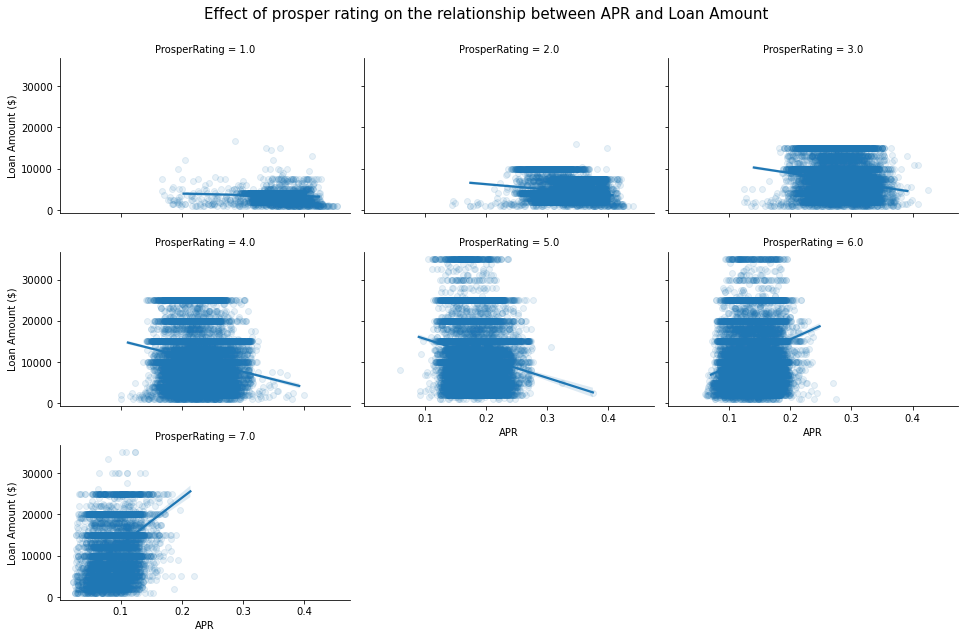

In [12]:
#visualisation
#using faceting grid to show the relationships
g = sns.FacetGrid(data = df, aspect = 1.5, height = 3, col = 'ProsperRating', col_wrap = 3)
g.map(sns.regplot, 'APR', 'LoanAmount', x_jitter = 0.04, scatter_kws = {'alpha': 0.1})
g.add_legend()
plt.suptitle('Effect of prosper rating on the relationship between APR and Loan Amount', fontsize=15);
g.set_ylabels('Loan Amount ($)')
g.set_xlabels('APR')
plt.subplots_adjust(top = 0.9);

### Relationship between APR, Income range and Term

The figure indicates that people that are not employed have the highest APR. This is because the loan company considers them to have the highest risk in terms paying back the loan. Furthermore, it was observed that the APR reduces for each term as the income range increases. This maybe because people with high income range tend to have low risk of paying up. Hence, they have low APR.

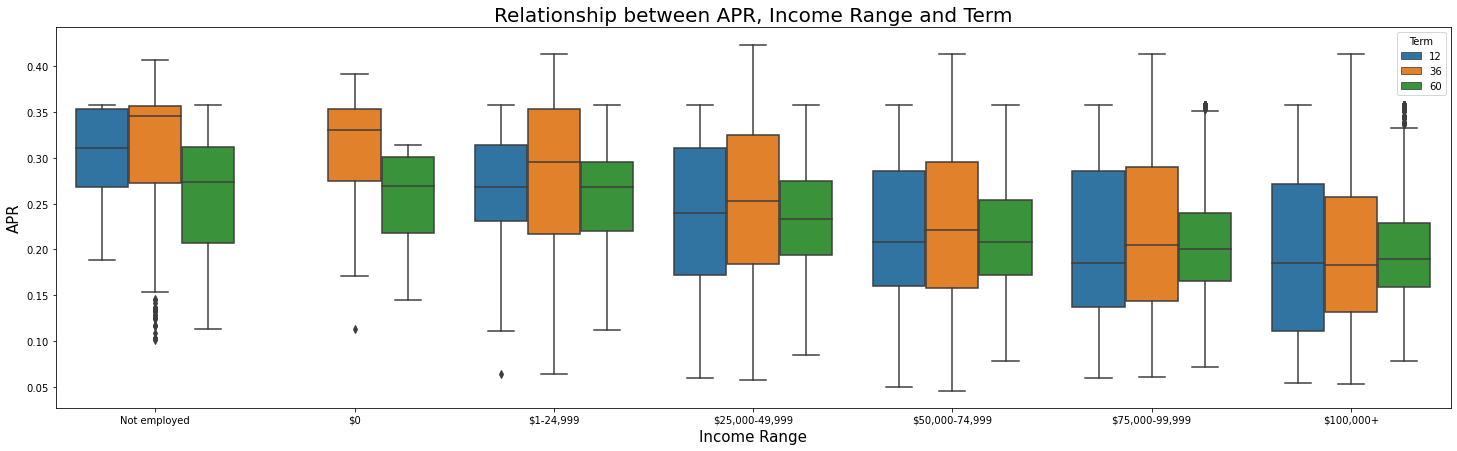

In [13]:
fig = plt.figure(figsize = [25,7])
sns.boxplot(data = df, x='IncomeRange', y='APR', hue = 'Term');
plt.title('Relationship between APR, Income Range and Term', fontsize=20)
plt.ylabel('APR', fontsize=15)
plt.xlabel('Income Range', fontsize=15);